<a href="https://colab.research.google.com/github/dsarahtika/datacleaning/blob/main/Dhania_PyDataCleaning_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Description:
Based on the description on Kaggle, this is a data frame about customer characteristics with an emphasis on customer churn. There are 7043 rows and 21 variables.



However, there are inconsistencies in the data frame. The first one I found was that the "TotalCharges" data were in the string form instead of integer/float.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
df_cust = pd.read_csv('/content/drive/MyDrive/Data Science Bootcamp Day 9/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_cust.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
df_cust.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3000,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55,Yes
5437,7000-WCEVQ,Female,1,No,No,20,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Mailed check,61.60,1174.35,Yes
6776,6120-RJKLU,Female,1,Yes,No,62,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),79.95,4819.75,No
6957,3914-FDRHP,Male,0,No,No,9,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,No,Electronic check,86.25,770.5,No
4320,5324-KTGCG,Male,0,Yes,No,71,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,20.85,1539.75,No
6525,2400-FEQME,Male,0,Yes,Yes,55,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.50,1177.95,No
1660,1171-TYKUR,Male,0,Yes,No,47,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,25.40,1139.2,No
5164,6135-OZQVA,Female,0,No,No,7,Yes,Yes,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,53.65,404.35,No
1603,7459-RRWQZ,Female,0,No,No,15,Yes,Yes,DSL,Yes,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),64.65,994.55,Yes
1938,7243-LCGGZ,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.90,20.9,No


In [ ]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Identification

The result of df_cust.info() showed that there were no missing values as each column has 7043 values. I checked the head, tail, and sample (10 samples), and I could not figure out any strange values that could be considered as missing.

However, there are inconsistencies in the data frame. The first one I found was that the "TotalCharges" data were in the string form instead of integer/float.

In [ ]:
df_cust['TotalCharges'] = pd.to_numeric(df_cust['TotalCharges'],errors='coerce')

In [ ]:
df_cust.sample(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2911,9747-DDZOS,Female,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Bank transfer (automatic),73.50,73.50,Yes
1663,5364-XYIRR,Male,0,Yes,No,51,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.65,4812.75,Yes
5857,0378-NHQXU,Female,0,Yes,Yes,17,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,No,Electronic check,88.25,1460.65,Yes
993,9108-EQPNQ,Female,0,Yes,Yes,10,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),26.10,225.55,No
2918,2761-XECQW,Male,1,Yes,No,8,No,No phone service,DSL,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Mailed check,43.35,371.40,No
3563,6741-EGCBI,Male,1,No,No,30,Yes,Yes,Fiber optic,Yes,No,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),90.50,2595.85,No
6874,4926-UMJZD,Female,0,Yes,No,31,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,49.20,1498.55,No
2367,0235-KGSLC,Female,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),85.55,85.55,Yes
114,5256-SKJGO,Female,0,Yes,Yes,64,No,No phone service,DSL,No,Yes,No,Yes,Yes,Yes,Two year,Yes,Electronic check,54.60,3423.50,No
3960,7404-JLKQG,Female,0,No,No,3,Yes,No,DSL,No,No,Yes,No,Yes,No,Month-to-month,No,Electronic check,57.55,161.45,No


In [ ]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df_cust['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [ ]:
df_cust['TotalCharges'].isnull().values.any()

True

In [ ]:
df_cust['TotalCharges'].isnull().sum()

11

The number of missing values is less than 35% of the data, so I decided to drop the rows containing missing values.

In [ ]:
df_cust_new = df_cust.dropna()

In [ ]:
df_cust_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


# Checking for Duplicates

In [ ]:
len(df_cust_new.drop_duplicates()) / len(df_cust_new)

1.0

# Checking for Outliers

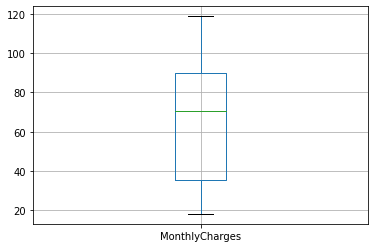

In [ ]:
df_cust_new[['MonthlyCharges']].boxplot()

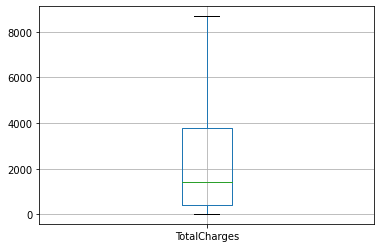

In [ ]:
df_cust_new[['TotalCharges']].boxplot()

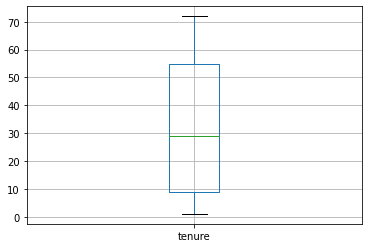

In [ ]:
df_cust_new[['tenure']].boxplot()

According to the boxplots, there are no outliers in the numerical data.

# Categorical Data Encoding

Next, I would like to do one-hot encoding to the 'gender' column.

In [ ]:
df_cust_new['gender'] = pd.get_dummies(df_cust_new['gender'],drop_first=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1 = Female, while 0 = male

In [ ]:
df_cust_new['Partner']

0       Yes
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041    Yes
7042     No
Name: Partner, Length: 7032, dtype: object

In [ ]:
df_cust_new['Partner'] = df_cust_new['Partner'].apply(lambda x: 1 if x == 'Yes' else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_cust_new['Partner']

0       1
1       0
2       0
3       0
4       0
       ..
7038    1
7039    1
7040    1
7041    1
7042    0
Name: Partner, Length: 7032, dtype: int64

In [ ]:
df_cust_new['Dependents']

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7032, dtype: object

In [ ]:
df_cust_new['Dependents'] = df_cust_new['Dependents'].apply(lambda x: 1 if x == 'Yes' else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_cust_new['Dependents']

0       0
1       0
2       0
3       0
4       0
       ..
7038    1
7039    1
7040    1
7041    0
7042    0
Name: Dependents, Length: 7032, dtype: int64

In [ ]:
df_cust_new.sample(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
180,6317-YPKDH,Female,0,0,0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Bank transfer (automatic),29.95,29.95,Yes
2293,9339-FIIJL,Male,0,0,0,72,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),85.95,6151.90,No
6036,8008-ESFLK,Female,0,0,0,53,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,110.50,5835.50,No
916,3956-CJUST,Female,1,0,0,23,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.40,1643.55,No
6847,8930-XOTDP,Female,0,0,1,18,Yes,No,DSL,No,No,No,No,Yes,No,Month-to-month,No,Mailed check,55.95,1082.80,No
6504,6110-OHIHY,Male,0,0,0,3,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,No,Electronic check,79.25,267.60,Yes
1977,5692-ICXLW,Male,1,0,0,31,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.70,2845.15,No
6229,6631-HMANX,Male,0,0,0,72,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),85.45,6227.50,No
2386,1247-QBVSH,Female,0,0,1,43,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,No,Mailed check,50.20,2169.40,No
2196,6131-IUNXN,Female,0,0,1,19,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,382.20,No


In [ ]:
df_cust_new['PhoneService'] = df_cust_new['PhoneService'].apply(lambda x: 1 if x == 'Yes' else 0)
df_cust_new['PaperlessBilling'] = df_cust_new['PaperlessBilling'].apply(lambda x: 1 if x == 'Yes' else 0)
df_cust_new['Churn'] = df_cust_new['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df_cust_new.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3816,4304-XUMGI,Male,1,0,1,50,1,Yes,DSL,Yes,Yes,Yes,No,No,Yes,Two year,1,Bank transfer (automatic),75.15,3822.45,0
1753,2057-BOYKM,Female,1,0,0,72,1,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,1,Bank transfer (automatic),96.60,6827.50,0
104,3192-NQECA,Male,0,0,0,68,1,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,1,Bank transfer (automatic),110.00,7611.85,1
6837,6229-LSCKB,Male,1,0,0,6,1,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,1,Electronic check,79.70,497.60,0
5137,8016-NCFVO,Male,1,0,0,55,1,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,116.50,6382.55,0


In [ ]:
df_cust_new['InternetService'] = pd.get_dummies(df_cust_new['InternetService'],drop_first=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_cust_new['PaymentMethod'] = pd.get_dummies(df_cust_new['PaymentMethod'],drop_first=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_cust_new['Contract']

0       Month-to-month
1             One year
2       Month-to-month
3             One year
4       Month-to-month
             ...      
7038          One year
7039          One year
7040    Month-to-month
7041    Month-to-month
7042          Two year
Name: Contract, Length: 7032, dtype: object

In [ ]:
pd.get_dummies(df_cust_new['Contract'],drop_first=False)

,Month-to-month,One year,Two year
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0
...,...,...,...
7038,0,1,0
7039,0,1,0
7040,1,0,0
7041,1,0,0


In [ ]:
def label_encoding_contract_column(x):
    if x == 'Month-to-month':
        return 0
    elif x== 'One year':
        return 1
    else: 
        return 2

In [ ]:
df_cust_new['Contract'] = df_cust_new['Contract'].apply(label_encoding_contract_column)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_cust_new.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
898,4315-MURBD,1,0,0,0,12,1,1,0,Yes,No,No,Yes,Yes,Yes,0,1,1,98.90,1120.95,1
5790,0980-PVMRC,1,0,0,1,40,0,0,1,No,Yes,No,No,Yes,Yes,0,1,0,50.85,2036.55,0
6370,2869-ADAWR,1,0,0,0,45,1,2,0,No,Yes,No,No,Yes,No,0,1,0,89.30,4016.85,1
4554,4329-YPDDQ,0,0,0,0,20,1,1,0,Yes,Yes,Yes,Yes,Yes,Yes,0,1,1,108.20,2203.70,0
677,0822-GAVAP,1,0,0,0,2,0,0,1,No,No,No,No,No,Yes,0,1,0,34.70,62.25,1
5024,8774-GSBUN,0,0,0,0,72,1,2,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,2,0,0,25.40,1797.10,0
1515,1921-KYSAY,1,0,0,0,41,1,2,1,No,No,Yes,Yes,No,Yes,1,1,0,68.60,2877.05,0
4132,6834-NXDCA,1,0,0,0,13,0,0,1,No,No,No,No,No,No,0,1,0,23.90,300.80,1
4631,2462-XIIJB,0,0,0,0,5,1,2,0,No,No,Yes,No,Yes,No,0,1,0,92.50,452.70,1
2194,2514-GINMM,0,0,0,0,1,1,1,0,No,No,No,No,Yes,No,0,1,0,79.50,79.50,1


In [ ]:
pd.get_dummies(df_cust_new['MultipleLines'],drop_first=False)

,No,No phone service,Yes
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0
...,...,...,...
7038,0,0,1
7039,0,0,1
7040,0,1,0
7041,0,0,1


In [ ]:
def label_encoding_multiplelines_column(x):
    if x == 'No phone service':
        return 0
    elif x== 'No':
        return 1
    else: 
        return 2

In [ ]:
df_cust_new['MultipleLines'] = df_cust_new['MultipleLines'].apply(label_encoding_multiplelines_column)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
pd.get_dummies(df_cust_new['OnlineSecurity'],drop_first=False)

,No,No internet service,Yes
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0
...,...,...,...
7038,0,0,1
7039,1,0,0
7040,0,0,1
7041,1,0,0


In [ ]:
def label_encoding_internet_columns(x):
    if x == 'No internet service':
        return 0
    elif x== 'No':
        return 1
    else: 
        return 2

In [ ]:
df_cust_new['OnlineSecurity'] = df_cust_new['OnlineSecurity'].apply(label_encoding_internet_columns)
df_cust_new['OnlineBackup'] = df_cust_new['OnlineBackup'].apply(label_encoding_internet_columns)
df_cust_new['DeviceProtection'] = df_cust_new['DeviceProtection'].apply(label_encoding_internet_columns)
df_cust_new['TechSupport'] = df_cust_new['TechSupport'].apply(label_encoding_internet_columns)
df_cust_new['StreamingTV'] = df_cust_new['StreamingTV'].apply(label_encoding_internet_columns)
df_cust_new['StreamingMovies'] = df_cust_new['StreamingMovies'].apply(label_encoding_internet_columns)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df_cust_new.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5639,6490-FGZAT,0,0,0,0,6,1,1,0,0,0,0,0,0,0,0,0,0,20.65,109.30,0
4310,8908-NMQTX,0,0,0,0,72,0,0,1,2,2,2,2,2,2,2,1,1,65.60,4566.50,0
4001,7446-KQISO,0,0,0,1,45,1,2,0,1,2,2,2,2,2,2,1,1,109.75,4900.65,0
2247,0362-RAOQO,1,0,0,0,40,1,1,0,0,0,0,0,0,0,2,0,0,19.65,830.25,0
3439,0917-EZOLA,0,1,0,0,72,1,2,0,1,2,2,1,2,2,2,1,1,104.15,7689.95,1
5824,5321-NTRKC,0,0,0,1,66,1,2,1,1,2,2,1,2,2,2,0,1,79.85,5234.95,0
2069,6356-ELRKD,1,0,0,0,1,1,1,0,2,1,1,1,2,2,0,1,0,95.60,95.60,1
3872,2018-PZKMU,0,0,0,1,9,1,1,0,1,1,2,2,2,2,0,0,0,103.10,970.45,0
6203,1090-PYKCI,1,0,0,1,69,1,2,0,2,2,2,2,2,1,1,1,0,105.10,7234.80,0
539,5394-MEITZ,1,0,0,1,60,1,1,1,1,2,2,2,2,2,2,1,1,80.60,4946.70,0


# Numerical Data Scaling

In [ ]:
def standardized(series_col):
    return (series_col - series_col.mean()) / series_col.std()

In [ ]:
df_cust_new['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [ ]:
standardized(df_cust_new['TotalCharges'])

0      -0.994123
1      -0.173727
2      -0.959581
3      -0.195234
4      -0.940391
          ...   
7038   -0.129171
7039    2.240896
7040   -0.854453
7041   -0.872033
7042    2.012201
Name: TotalCharges, Length: 7032, dtype: float64

In [ ]:
standardized(df_cust_new['TotalCharges']).describe()

count    7.032000e+03
mean    -1.724951e-15
std      1.000000e+00
min     -9.989982e-01
25%     -8.301898e-01
50%     -3.907873e-01
75%      6.667797e-01
max      2.824061e+00
Name: TotalCharges, dtype: float64

In [ ]:
standardized(df_cust_new['MonthlyCharges']).describe()

count    7.032000e+03
mean    -1.356108e-15
std      1.000000e+00
min     -1.547173e+00
25%     -9.709078e-01
50%      1.845309e-01
75%      8.330889e-01
max      1.793254e+00
Name: MonthlyCharges, dtype: float64